<img height="120" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/cropped-logo-fcfm-die-1.png">

# Curso EL4203 Programación avanzada **Módulo 4**
### Por *Joaquin Zepeda Valero*

Los objetivos de este módulo son:

1. Efectuar análisis matemático de algoritmos.
2. Evaluar la eficiencia de la implementación de la solución
en cuanto al uso de recursos computacionales, por
ejemplo, uso de memoria y tiempo de ejecución.
3. Aplicar programación dinámica para la evaluación de
complejidad computacional en la optimización de
algoritmos.


Contenidos:

* Estudio de los algoritmos
* Programación dinámica
* Grafos
* Computación paralela


[Referencias](https://colab.research.google.com/drive/1ej3ZGUCJu1pRP7xF0RqS4MbAOYCxvk_6?usp=sharing)

# Comparación de algoritmos de ordenación

En los módulos anteriores se mostraron algunos algoritmos de ordenación, a continuación se presenta una tabla resumen de las complejidades de estos.

<center>

| Nombre | Caso promedio | Peor caso de estudio   | Memoria auxiliar |
| -- | -- | --| -- |
| Quicksort | $O(n \log{n})$ |$O(n^{2}) $  | $O(\log{n})$|
| Heapsort | $O(n \log{n})$ | $O(n \log{n})$  | $1$  |
| Mergesort | $O(n \log{n})$ | $O(n\log{n})$| depende  |

</center>



# Comparación de algoritmos de búsqueda

En los módulos anteriores se mostraron algunos algoritmos de búsqueda, a continuación se presenta una tabla resumen de las complejidades de estos.

<center>

| Implementación | Caso promedio | Peor caso de estudio   | 
| -- | -- | --| 
| Arreglo desordenado | $\frac{n}{2}$ | $n$ | 
| Arreglo ordenado (búsqueda binaria) | $\log{n}$ | $\log{n}$  | 
| Lista desordenada |  $\frac{n}{2}$ | $n$ | 
| Lista ordenada |  $\frac{n}{2}$ | $n$ | 
| Árboles de búsqueda binaria |  $\log{n}$  | $n$ | 

</center>


# Programación dinámica

También conocido como DP por sus siglas en inglés. Este tipo de programación busca solucionar los problemas en los cuales no se logró obtener soluciones optimas usando otras técnicas. La programación dinámica se basa en la **memoización**, a diferencia de divide y vencerás en donde, se divide el problema en subproblemas independientes los cuales pueden ser superpuestos. Esto es de mucha utilidad pues en general se almacenan los sub problemas ya resueltos para luego utilizarlos para resolver los próximos sub problemas, la programación dinámica **reduce los algoritmos de tiempo exponencial ($O(k^n$)) a orden polinómico ($O(n^k)$) para muchos problemas**. \\
Los mayores componentes de DP corresponden a:
 
*   Recursión: resuelve sub problemas de forma recursiva.
*   Memoización: guarda los valores ya calculados en una tabla.


\begin{equation}
\text{Dynamic Programming (DP)} = \text{Recursion} + \text{Memoization}
\end{equation}


# Ejemplo Fibonacci
 

Volviendo a utilizar la ecuación de Fibonacci
$$
\begin{align}
f_n &= f_{n-1}+f_{n-2} \text{ para } n\ge 2\\
f_0 &= 0\\
f_1 &= 1
\end{align}
$$


In [ ]:
# Función recursiva
def fib_rec(n):
    if n <= 1:
        out = n
    else:
        out = fib_rec(n-1) + fib_rec(n-2)
    return out
print(fib_rec(10))

55


Esta solución recursiva como se mostró en el módulo 2 es de tiempo exponencial $O(2^n)$ lo cual se vuelve muy ineficiente cuando $n$ es grande. El motivo de esto es que en las llamadas recursivas un mismo número de fibonnaci se calcula independiente si ya fue calculado, por ejemplo si calculamos el número de fibonacci para $5$:
 
\begin{align}
&fib(5) \\
&fib(4) + fib(3) \\
&(fib(3) + fib(2)) + (fib(2)+fib(1)) \\
&(fib(2)+fib(1)) + (fib(1)+fib(0)) + (fib(1)+fib(0))+(fib(1)) \\
&( (fib(1)+fib(0))+fib(1)) + (fib(1)+fib(0)) + (fib(1)+fib(0))+(fib(1)) \\
\end{align}
 
En este ejemplo, se calcula $3$ veces el valor de $fib(2)$, es decir, se resuelve 3 veces el mismo subproblema. Mientras mayor el $n$, mayor es el número de subproblemas que se calculan más de una vez. Para solucionar esto se puede guardar los valores de los subproblemas para así en caso de necesitarlos se puede acceder al valor de ellos. 
 
## Memoización
 
Comienza una tabla o arreglo que guarda los valores de los subproblemas, luego si la función es llamada se mira la respuesta en la tabla de algún subproblema.



## Mejora de la función de Fibonacci:

Una de las formas es utilizar una lista de Python como tabla para guardar los valores de los problemas, esto tambien se puede mejorar utilizando un arreglo de numpy pues estos permiten acceder a sus elementos de forma rápida sin importar su tamaño.

In [ ]:
def fib_DP(n):
    fibTable = [0,1] #tabla donde se guardan los datos
    for i in range(2,n+1):
        fibTable.append(fibTable[i-1]+fibTable[i-2])
    return fibTable[n]
print(fib_DP(10))

55


In [ ]:
import numpy as np
def fibonacci(n):
    F=np.zeros(n+1,dtype=int) #tabla donde se guardan los datos
    F[0]=0
    F[1]=1
    for k in range(2,n+1):
        F[k]=F[k-1]+F[k-2]
    return F[n]
print(fibonacci(10))

55


El uso de una memoria auxiliar permite transformar el algoritmo de tiempo exponencial $O(2^n)$ a tiempo polinomial (en específico tiempo lineal pues se utiliza $1$ solo ciclo for) $O(n)$. Esto es una gran mejora en tiempos de ejecución para valores de $n$ grandes.
 
A continuación se puede probar los tiempos que se demora cada función, para $n>30$ ya es significativo el tiempo que se demora la función $fib\_rec$.

In [ ]:
n = 40
assert n<64, 'use un menor valor de n'

In [ ]:
import time #ojo que este se demora un poco
inicio = time.time()
print(fib_rec(n))
fin = time.time()
print("{:.2f}".format(fin-inicio),'Segundos')

102334155
45.54 Segundos


In [ ]:
import time
inicio = time.time()
print(fib_DP(n))
fin = time.time()
print("{:.2f}".format(fin-inicio),'Segundos')



102334155
0.00 Segundos


In [ ]:
import time
inicio = time.time()
print(fibonacci(n))
fin = time.time()
print("{:.2f}".format(fin-inicio),'Segundos')

102334155
0.00 Segundos


### Resultados para $n=40$

No se ven diferencias significativas al utilizar fib_DP y fibonacci, las cuales utilizan programación dinámica con listas de Python y arreglos de Numpy respectivamente, pero la función recursiva se demora un tiempo significativo al calcular el número de fibonacci. Espero que con este ejemplo se vea la importancia de optimizar algoritmos y de esta solución.

<center>

|  <font size="4">  fib_rec </font>|  <font size="4">fib_DP</font> | <font size="4">fibonacci</font> |
| -- | -- | -- |
|<font size="3"> 45.54 [s] </font>|<font size="3"> 0.00 [s]</font> |<font size="3"> 0.00 [s] </font>|

</center> 

**Nota:** Estos valores pueden variar dependiendo del hardware con el que se ejecute el código. Por otro lado, se puede derrotar el algoritmo lineal de la función de fibonacci y llevarla a un tiempo logarítmico utilizando una variable auxiliar y matrices.


**Mejora de espacio:** No es necesario guardar todos los valores anteriores, basta con guardar los 2 últimos como se muestra en el código a continuación:

In [ ]:
def fib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a+b
    return a
print(fib(40))

102334155


# Ejemplo: Factorial de un número

Se define el factorial de un número $n$ como:

\begin{align}
n! =& n⋅(n-1)! \\
1! =& 1 \\
0! =& 1
\end{align}

Implementarla en forma recursiva es bastante simple y se muestra a continuación:

In [ ]:
def factorial(n):
    if n==0:return 1 #caso base
    return n*factorial(n-1)
print(factorial(5))

120


Esta función es de orden lineal $O(n)$. En caso de querer calcular el factorial de $m$ con $m>n$, nuevamente se deben calcular todos los factoriales anteriores, esto se puede optimizar usando programación dinámica y una tabla para guardar los valores de los factoriales ya calculados, es decir si se busca este $m$, solo es necesario encontrar los factoriales entre $n$ y $m$, pues los otros ya están calculados.

In [ ]:
factTable={} #los valores guardados se van guardando en un diccionario
def factorial(n):
    try:
        return factTable[n] #trata de ver si ya está calculado el factorial
    except KeyError:
        if n == 0: #caso base
            factTable[0] = 1
            return 1
        else:
            factTable[n] = n*factorial(n-1)
            return factTable[n]
print(factorial(5))


120


# Problema de la Mochila o Knapsack Problem 
Un algoritmo de problema de la mochila es una estrategia para abordar la optimización combinatoria de manera constructiva. 
 
 
<h4>El problema es el siguiente: </h4>
<h5>
 
> Dado un conjunto de elementos los cuales presentan cada uno un peso y un valor o beneficio en específico, se busca determinar el número de cada elemento para incluir en una colección para que el peso total sea menor o igual a un límite dado y además el valor o beneficio sea el máximo. 
Esto se puede pensar como un problema de objetos que se quieren llevar en una mochila, se tienen distintos artículos valiosos los cuales tienen distinto volumen (peso) y valor, la mochila tiene un tamaño fijo por lo que se busca ver cuáles elementos elegir para llevar con los artículos más valiosos.

</h5>

## Algunas Soluciones populares a este problema
 
 
1. <h4> Fuerza bruta </h4> Esta solución se basa en determinar todas las posibles opciones y comparándolas. En el caso del ejemplo a continuación se presenta una solución recursiva la cual es de tiempo del orden $O(2^{n})$ tiene muchos subproblemas redundantes. 
 
 
2.  <h4> Algoritmos avaros o Greedy Algorithms </h4> 
 
    Este tipo de algoritmos implementan selecciones locales óptimas con la esperanza de que esas selecciones conduzcan a la mejor solución, en resumen, se selecciona la mejor opción en el momento sin considerar que la selección puede afectar las futuras selecciones. 
 
    Esta solución es de tiempo del orden $O(n*logn)$ pero no siempre da la solución óptima.
 
3. <h4> Programación dinámica </h4>  Esta solución es similar  a la de la fuerza bruta, pero se utiliza una tabla para ir guardando los valores ya calculados con el fin de no repetir los cálculos ya realizados. 
 
    Esta solución es de tiempo del orden $O(N*W)$ con $N$ el número de elementos y $W$ la capacidad de la mochila.





In [ ]:
# Fuerza Bruta
def knapSack(W, wt, val, n):
   # initial conditions
   if n == 0 or W == 0 :
      return 0
   # If weight is higher than capacity then it is not included
   if (wt[n-1] > W):
      return knapSack(W, wt, val, n-1)
   # return either nth item being included or not
   else:
      return max(val[n-1] + knapSack(W-wt[n-1], wt, val, n-1),
         knapSack(W, wt, val, n-1))
# To test above function
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print("Valor óptimo:",knapSack(W, wt, val, n)) 

Valor óptimo: 220


In [ ]:
# Programación dinámica
def knapSack(W, wt, val, n): 
    K = [[0 for x in range(W + 1)] for x in range(n + 1)] 
   
    # Build table K[][] in bottom up manner 
    for i in range(n + 1): 
        for w in range(W + 1): 
            if i == 0 or w == 0: 
                K[i][w] = 0
            elif wt[i-1] <= w: 
                K[i][w] = max(val[i-1] 
                          + K[i-1][w-wt[i-1]],   
                              K[i-1][w]) 
            else: 
                K[i][w] = K[i-1][w] 

    return K[n][W] 
   
   
# Driver code 
val = [60, 100, 120] 
wt = [10, 20, 30] 
W = 50
n = len(val) 
print("Valor óptimo:",knapSack(W, wt, val, n)) 

Valor óptimo: 220


# Nano Desafío 14: Recurrencia

**Problema:** Convierta la siguiente recurrencia en una función recursiva, luego optimice esta solución utilizando programación dinámica.

\begin{align}
T(0) =& T(1) = 2 \\
T(n) =& \sum_{i=1}^{n-1} 2⋅T(i)⋅T(i-1), \text{para n>1}
\end{align}

**Ejemplos:**
<center>

| $𝑛$  | 0 | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |--- |
| $f_n$ | 2 | 2 | 8 | 40 | 680 | 55080 | 

</center>

**Nota:** la función $f_2$ se puede optimizar hasta llegar a tiempo lineal $O(n)$ utilizando programación dinámica, ¿Su solución de que orden es?  

In [ ]:
#Función recursiva sin utilizar programación dinámica
def f(n):
    #escriba su código aqui
    pass
assert f(4)==680
assert f(5)==55080

AssertionError: ignored

In [ ]:
#Función utilizando programación dinámica
def f2(n):
    #escriba su código aqui
    pass
assert f2(4)==680
assert f2(5)==55080

# Grafos

Un grafo es una representación de un sistema que contiene un número de elementos interconectados. Los elementos se representan con **nodos** o **vértices** y las interconexiones se representan por **ejes** o **arcos**.
 
Por ejemplo un grafo puede representar un mapa de ciudades y las carreteras que las conectan, representar las relaciones de amistad en una comunidad, representar las relaciones en una empresa, representar una cadena alimenticia, etc.
 
El siguiente ejemplo representa 3 personas con sus respectivos seguidores en Instagram, Gonza sigue a Carla y a Ale, Carla sigue a Gonza y a Ale y Ale no sigue a nadie. 
 
<div align="center">
<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/grafo1.png">
</div>
 
 
En algunos grafos, **los arcos pueden tener atributos como largo, costo o peso**. Por ejemplo en un mapa que conecta ciudades los arcos pueden tener un atributo que representa la distancia entre ciudades, en una red social pueden haber distintos tipos de arcos dependiendo de la relación (amistad, trabajo, etc).
 
Los arcos pueden ser **dirigidos** y **no dirigidos**, además dependiendo de la relación pueden ser simétricos o asimétricos. En los diagramas los arcos dirigidos se representan con una flecha y los no dirigidos con una línea.
 
 
A continuación se muestra un grafo no dirigido de algunas ciudades de Chile en donde los arcos representan el tiempo en auto entre ciudades. 
 
<div align="center">
<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/grafo2.png">
</div>
 
 
Además de esto, cabe destacar que los grafos comenzaron como una teoría matemática, la cual luego cobró importancia al introducirse a la computación. Existe mucha teoría y problemas matemáticos y algoritmos que resuelven estos problemas.
 
¿Por qué usar grafos? 
> Los grafos son útiles pues muchos problemas de la vida real se pueden resolver utilizando algoritmos de grafos. Por ejemplo, el algoritmo de Dijkstra's es un algoritmo eficiente para determinar el camino más corto entre un nodo a todos los otros.
 
 
A continuación se muestra un grafo no dirigido de algunas ciudades de Chile en donde los arcos representan el tiempo en auto entre ciudades. 

<div align="center">
<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/grafo2.png">
</div>


Además de esto, cabe destacar que los grafos comenzaron como una teoría matematica, la cual luego cobró importancia al introducirse a al computación. Existe mucha teoría y problemas matematicos y algoritmos que resuelven estos problemas.

¿Por que usar grafos? 
> Los grafos son utiles pues muchos problemas de la vida real se pueden resolver utilizando algoritmos de grafos. Por ejemplo, el algoritmo de Dijkstra's es un algoritmo eficiente para determinar el camino más corto entre un nodo a todos los otros.




## Representando grafos con Matrices de adyacencia

Un grafo se puede representar con una Matriz $M$, en donde si $M[i,j]=1$ si existe un arco entre el nodo $i$ y el nodo $j$, y $0$ en caso contrario. Esta matriz no es simétrica.

Una matriz de adyacencia permite determinar si $2$ nodos están conectados o no en **tiempo constante**, lo cual es bueno, pero requieren $O(n^2)$ bits de memoria (pues son Matrices de $nxn$). 

<div align="center">
<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/ejemplo_grafo.png">
</div>


Dado el siguiente grafo directo, su matriz de adyacencia está dada por:
<center>

|   | <font size="4">A </font>| <font size="4">B </font> |  <font size="4"> C </font>|  <font size="4">D </font> |
|---|---|---|---|---|
|  <font size="4">A </font> | <font size="3">0 </font>| <font size="3">1 </font>| <font size="3">0 </font>| <font size="3">1 </font>|
|  <font size="4">B </font> | <font size="3">0 </font>| <font size="3">0 </font>| <font size="3">1 </font>| <font size="3">0 </font>|
| <font size="4"> C </font> | <font size="3">1</font> | <font size="3">0 | <font size="3">0 </font>| <font size="3">1 </font>|
|  <font size="4">D </font> | <font size="3">0</font> |<font size="3"> 0 </font>| <font size="3">0</font> | <font size="3">0 </font>|

</center>

## Representando grafos con Listas de adyacencia

Otra forma de representar grafos es utilizando listas enlazadas. Para cada nodo o vertice se usa una lista enlazada y una lista de nodos que representa las conexiones entre el vertice x con otros vertices con los cuales el vertice x tiene un arco. Por otro lado, una alternativa similar es utilizar una lista de listas para guardar estos valores.

<div align="center">
<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/lista_grafo.png">
</div>

Si bien esta representación ocupa menos espacio $O(n)$ siendo $n$ el largo de los nodos, permite un acceso eficiente a los vertices adyacentes pero no permite acceso directo a los arcos.


# Representando grafos con Python usando NetworkX

NetworkX es una líbreria externa que es bastante utilizada para representar grafos, más información en la [documentación](https://networkx.org/documentation/networkx-1.9/).

Para crear un **grafo dirigido** se puede instanciar la clase *DiGraph()*.



In [ ]:
import networkx as nx
G = nx.DiGraph()

Luego el objeto G representa un grafo vacio, al cual se le pueden añadir nodos con el método *add_node*.

In [ ]:
G.add_node('Gonza')
G.add_node('Carla')
G.add_node('Ale')
list(G.nodes())

['Gonza', 'Carla', 'Ale']

Se pueden añadir arcos utilizando el método *add_edge*, en general son bastante intuitivos los métodos y se pueden ver en la documentación de la líbreria.

In [ ]:
G.add_edge('Gonza', 'Carla')
G.add_edge( 'Carla','Gonza')
G.add_edge('Carla', 'Ale')
G.add_edge('Gonza', 'Ale')
list(G.edges())

[('Gonza', 'Carla'), ('Gonza', 'Ale'), ('Carla', 'Gonza'), ('Carla', 'Ale')]

NetworkX provee varias funciones para graficar grafos. Una de las funciones para graficar grafos con los vértices o nodos como círculos conectados por los arcos se muestra a continuación: 

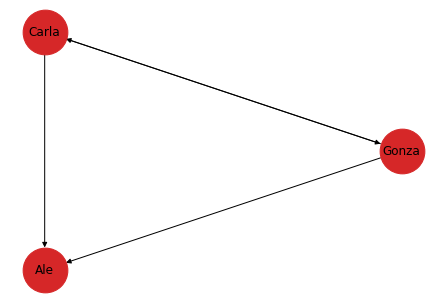

In [ ]:
nx.draw_circular(G,
    node_color='C3',
    node_size=2000,
    with_labels=True)

Se pueden definir posiciones con un diccionario agregando *longitud* y *latitud* aproximadas.

In [ ]:
positions = dict(LaSerena=(-74, 46),
                Stgo=(-73, 42),
                Valpo=(-75, 43),
                Chillan=(-74, 38),
                Valdivia=(-75, 35))


Para crear un **grafo no dirigido** se puede instanciar la clase *Graph()*. Luego el objeto G representa un grafo vacio, al cual se le pueden añadir nodos a partir de un diccionario con las posiciones. 

In [ ]:
G = nx.Graph()
G.add_nodes_from(positions)

Se le pueden agregar las conexiones con sus respectivos valores con el método *add_edges_from*.

In [ ]:
drive_times = {('LaSerena', 'Stgo'): 6,
                ('Valpo', 'Stgo'): 1,
                ('Stgo', 'Chillan'): 4,
                ('Chillan', 'Valdivia'): 5}
G.add_edges_from(drive_times)

Otra opción es graficar vertices o nodos cuadrados con la función *draw*. 

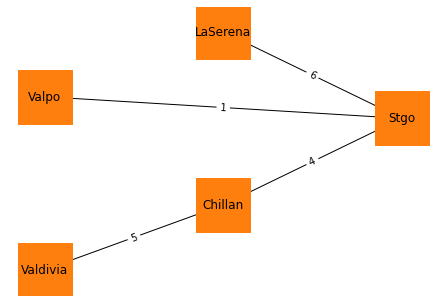

In [ ]:
nx.draw(G, positions,
        node_color='C1',
        node_shape='s',
        node_size=3000,
        with_labels=True)

txt = nx.draw_networkx_edge_labels(G, positions,
                edge_labels=drive_times)

## Grafos completamente conectados

In [ ]:
import numpy as np
import networkx as nx

In [ ]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

In [ ]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

A continuación se muestra un grafo en donde los 10 nodos estan conectados entre todos.

In [ ]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

Así se ve un grafo completamente conectado.

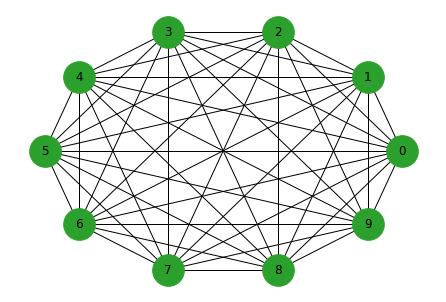

In [ ]:
nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)

## Grafos aleatorios

Existen muchos procesos aleatorios que pueden generar grafos, por lo que existen muchos tipos de grafos aleatorios.

En un grafo ER, la probabilidad de que un vertice esté conectado es muy baja cuando p es pequeño y casi 1 cuando p es grade.

In [ ]:
import numpy as np
import networkx as nx

In [ ]:
def flip(p):
    return np.random.random() < p

In [ ]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [ ]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Ejemplo con `n=10` y `p=0.3`

In [ ]:
np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

12

Así se ve un grafo aleatorio.

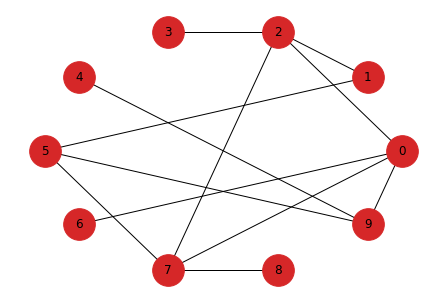

In [ ]:
nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)

## Analizando los algoritmos de los grafos
 
Analizar el rendimiento de los algoritmos se realiza en general al calcular cómo crecen los tiempos de ejecución a medida que aumenta el tamaño de los grafos. El orden de crecimiento de los algoritmos de los grafos generalmente se expresan como función del número de vértices ($n$) y el número de arcos ($m$).


## Algunos algoritmos con grafos

*   Algoritmo de Kruskal
*   Algoritmo de Prim
*   Algoritmo de Dijkstra para los caminos más cortos desde un nodo origen
*   Algoritmo de Floyd para todas las distancias más cortas



# Problema del viajero (TSP)

El problema del viajero o Traveling Salesman Problem corresponde a un problema de **optimización** combinatoria en la teoría de grafos, piense en un grafo en donde los nodos corresponden a las ciudades y los arcos corresponden a las carreteras que conectan cada ciudad, en donde el peso de cada ciudad indica la distancia entre las 2 ciudades.
 
 
<h4>El problema es el siguiente: </h4>
<h5>

> Encuentre el *camino* (*path*) que permita al viajero pasar por cada ciudad una vez y retornar a la ciudad inicial minimizando la distancia recorrida. 
</h5>

Este es un problema NP (polinomio no determinista) difícil, es decir, que para grandes valores de $n$ no es factible evaluar todas las soluciones posibles del problema dentro de un periodo de tiempo razonable. 


## Algunas Soluciones populares a este problema
 
1. Fuerza bruta
> Calcula y compara todas las posibles permutaciones de caminos para luego determinar el camino óptimo global. Esta solución se puede mejorar utilizando programación dinámica para ir guardando los valores de las rutas. Cuando el número de nodos es grande, esta solución es extremadamente ineficiente pues comienzan a existir muchos distintos caminos posibles.
 
2. The Nearest Neighbor Method
> Esta es quizás la heurística TSP más simple. La clave de este método es visitar siempre el destino más cercano y luego volver a la primera ciudad cuando se visitan todas las demás ciudades. Para resolver el TSP usando este método, elige una ciudad al azar y luego busca la ciudad no visitada más cercana y ve allí. Una vez que haya visitado todas las ciudades, debe regresar a la primera ciudad. Es una heurística miope, es decir, en una iteración escoge la mejor opción que tiene disponible, sin ver que esto puede obligar a tomar malas decisiones posteriormente; al final del proceso probablemente quedarán vértices cuya conexión obligará a introducir aristas de coste elevado.
 
3. Método Branch and bound (Ramificación y acotamiento)
> Divide el problema en muchos subproblemas a resolver. Cada subproblema puede tener varias soluciones posibles donde la solución seleccionada para un problema puede tener un efecto sobre las posibles soluciones de subproblemas posteriores.
Para utilizar este método se elige un nodo de inicio y luego se establece el límite en un valor muy grande (infinito en un comienzo). Luego se selecciona el arco con el valor más pequeño entre el nodo no visitado y el actual agregando esta distancia a la distancia actual (la cual se va a actualizar). Repita el proceso mientras la distancia actual sea menor que el límite. Si la distancia actual es menor que el límite, ya está. Ahora puede sumar la distancia para que el límite sea igual a la distancia actual. Repita este proceso hasta que todos los arcos hayan sido revisados.
 
4. Christofides algorithm 
> Corresponde a un algoritmo que encuentra una solución aproximada. El coste de la solución obtenida por el algoritmo es $3/2$ de la solución óptima. Sea G un grafo completo definido por un conjunto $V$ de vértices o nodos y una función $w$ que asocia un peso o valor a cada arco del grafo G, las fases para encontrar el óptimo aproximado son las siguientes:
    * Obtener el árbol recubridor mínimo *T* de G.
    * Sea $O$ un conjunto de vértices de grado impar en *T*, hallar un conjunto independiente de arcos (matching) *M* de mínimo peso en el grafo completo sobre los vértices de $O$. 
    * Combinar los arcos de *M* y *T* para crear un multigrafo *H*.
    * Obtener un ciclo euleriano en *H*.
    * Obtener un ciclo hamiltoniano a partir del ciclo euleriano anterior, descartando los nodos visitados. 
 
    Como podrán darse cuenta, se meniconan varios conceptos matematicos de la teoria de grafos que probablemente no conocen por lo que puede ser dificil de entender como funciona este algortimo, asi que [aqui](https://www.youtube.com/watch?v=dNCwtFJLsKI&ab_channel=SaucelessGiuseppe) les dejo un video explicativo sobre como funciona el algoritmo.  







## Ejemplo con 4 ciudades


Para encontrar el camino o ruta optima en un grafo con 4 nodos (que representan las 4 ciudades) se pueden determinar el número de posibles caminos de o ciclos posibles (esto pues el problema pide que pase por cada nodo solo una vez y que comience y termine en el mismo punto), existen $(n-1)!$ ciclos hamiltoneanos únicos posibles.

In [ ]:
import networkx as nx

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

G = nx.Graph()
nodes = ["Berlin","Dusseldorf","Hamburg","Munich"]
G.add_nodes_from(nodes)
G.add_edges_from(all_pairs(nodes))

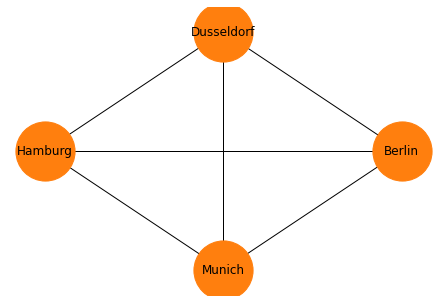

In [ ]:
nx.draw_circular(G, 
                 node_color='C1', 
                 node_size=3500, 
                 with_labels=True)

Los posibles caminos se presentan en la imagen a continuación, donde cada ramificación es una alternativa posible. Dependiendo de las distancias se elegiría el camino con menor distancia recorrida, este ejemplo muestra sólo la idea de cómo funciona la disposición de los caminos, como se puede observar existen $(4-1)!=6$ ciclos hamiltoneanos únicos.  

<div align="center">
<img width="500" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/Problema viajero/1.png">
</div>


## Ejemplo problema del viajero con 16 ciudades

¿ Cuál es el camino óptimo que permite a un viajero pasar por las 16 ciudades, pasando por cada ciudad una vez y retornar a la ciudad inicial minimizando la distancia recorrida?
 
Como se puede observar en la siguiente imagen, existen múltiples opciones y combinaciones de caminos posibles entre las ciudades, por lo que se vuelve un problema complejo. 


<div align="center">
<img width="500" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/Problema viajero/3.png">
</div>

Las distancias entre cada ciudad se muestra en la siguiente tabla:
<div align="center">
<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/Problema viajero/4.png">
</div>

La solución encontrada mediante el algoritmo de Christofides se presenta a continuación, donde el camino rojo corresponde al camino óptimo encontrado. Este algoritmo se puede aplicar con la librería NetworkX el cual ya lo trae implementado para grafos no dirigidos y retorna la lista de arcos que son parte de la solución. Por supuesto el grafo G debe estar creado con sus respectivos pesos y nodos.
```python
cycle = nx_app.christofides(G, weight="weight")
edge_list = list(nx.utils.pairwise(cycle))
```

<div align="center">
<img width="400" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/Problema viajero/7.png">
</div>

## Aplicaciones de TSP
 
 
 
*   **Vendedor viajero:** Por un lado se encuentra la aplicación del ejemplo, la cual resuelve el problema de un comerciante o viajero, por supuesto las ciudades pueden convertirse en puntos de venta y los arcos en vez de ser carreteras pueden ser las calles de la ciudad. 
 
*  **Problema de Scheduling:**Este problema es realmente complejo de resolver. Se formula de la siguiente forma: hay T tareas que realizar y m procesadores. Se busca una planificación en m procesadores para T minimizando el tiempo. Si ahondamos un poco más en este tipo de problemas, observamos que existen una gran cantidad de variantes asociadas a si hay orden parcial en T (es decir, algunas actividades son preferentes a otras)...
 
    En este caso las actividades pueden verse como las ciudades y los tiempos como las distancias. El objetivo es determinar una secuencia (schedule) de tal forma que se lleven a cabo en una cantidad mínima de tiempo. Para resolverlo se usa la versión asimétrica del TSP, es decir, debemos tener en cuenta que el costo de pasar de la tarea A a la B, puede ser diferente del costo de recorrer el camino inverso. Como aplicación más cercana, los problemas de scheduling los encontramos en la televisión, donde es necesario planificar un secuenciamiento óptimo de los comerciales durante un corte publicitario.
 
* **Creación de placas de circuitos impresos PCB:** Ésta es sin duda una de las utilidades más ingeniosas que puede plantear el problema del viajante de comercio: la creación de placas de circuitos. Este problema se enfoca en dos suproblemas: el orden óptimo de taladrar las placas y los caminos óptimos que comunican los chips. En los problemas de perforado hemos de tomar las ciudades como las posiciones a perforar y las distancias entre ellas como el tiempo que necesita la máquina en trasladarse de una a otra. El punto inicial y final será un punto adicional donde permanece la perforadora mientras descansa. Claramente si estas máquinas no son correctamente programadas el tiempo que tarda en recorrer un orificio u otro puede ser significativo con lo que la producción de placas bajaría en un período de tiempo.
 
    En el problema de conexión de chips la idea es minimizar la cantidad de cable necesaria para unir todos los puntos de una placa sin que haya interferencias. Como los chips son de pequeño tamaño no se pueden poner más de dos cables en un único pin. Tomando las ciudades como los pins y la cantidad de cable necesaria para unirlos como la distancia, el problema es equivalente al de viajante de comercio.
 
* **Aplicaciones en internet:** Supongamos que el viajante de comercio es un bit de datos, y que las ciudades son servidores de Red distribuidos por todo el planeta. Esta variante del problema del viajante de comercio es algo inherente al uso óptimo de una plataforma masiva de distribución como es Internet. No olvidemos que en cada ruta puede haber miles de ciudades en este caso. Es curioso como para resolver esta variante algunos investigadores se han inspirado en el comportamiento de las hormigas.
 
* **Aplicaciones en Transporte/red de basura:** El problema de la recolección de residuos puede dividirse en 3 grandes tipos: domiciliaria, comercial e industrial. La recolección domiciliaria consiste en atender fundamentalmente casas particulares. La frecuencia puede variar aunque normalmente las rutas suelen repetirse una vez todos los días. La recolección comercial o industrial se encarga de las tiendas, restaurantes o edificios de cocinas. Los objetivos en este tipo de problemas pueden ser diversos: minimizar el número de camiones, la distancia recorrida... Si queremos minimizar la distancia usaremos el problema del viajante de comercio identificando los contenedores o puntos de recogida como las ciudades a visitar. Estos mismos problemas se pueden generalizar a los llamados problemas de vehículos o de reparto. Se usan en las empresas de transportes, en correos, etc.
 
**Nota:** Estas son algunas de las aplicaciones de TSP, no son las únicas.
 
 



## Referencias del problema del viajero: 

[1] Himalaya Bir Shrestha (2021). 
Solving the Travelling Salesman Problem for Germany using NetworkX in Python. Available: https://towardsdatascience.com/solving-the-travelling-salesman-problem-for-germany-using-networkx-in-python-2b181efd7b07

[2] A. Carpintero, J. Díaz, V. Franco, Pilar López, A. Pérez (2015) . Departamento de Estadística e Investigación Operativa. Available: https://knuth.uca.es/moodle/mod/page/view.php?id=3415

[3]  G. González-Santander. El problema del viajante. Available: https://baobabsoluciones.es/blog/2020/10/01/problema-del-viajante/

[4] Suzanne Ma. Solving the Travelling Salesman Problem for deliveries. Available: https://blog.routific.com/travelling-salesman-problem


## Distancias mínimas en un grafo dirigido


Sea un grafo un conjunto $V$ de *vértices* (también llamados *nodos*) y un conjunto $E$ de *arcos*. El número de vértices se suele denotar $n$ y el número de arcos como $m$ (o a veces $e$).

Consideremos un grafo *dirigido* $G=(V,E)$, donde para cada arco $e=(u,v)$ se conoce su largo, o distancia, $d(e)=d(u,v)\ge 0$. Podemos extender la función $d$ a todo $V\times V$ si definimos $d(u,v)=\infty$ cuando $(u,v)\notin E$.

Si se define el largo de un camino como la suma de los largos de los arcos que lo componen, es interesante encontrar los caminos más cortos que unen a nodos del grafo.

Este problema se suele estudiar en dos variantes:

* Encontrar todos los caminos más cortos desde un nodo "origen" $s$ hasta todos los demás nodos del grafo.

* Encontrar todos los caminos más cortos entre todos los pares de nodos del grafo. Esto se puede resolver iterando $n$ veces el problema anterior, cambiando cada vez el nodo origen, pero es posible encontrar un algoritmo más simple si se resuelve todo de una vez.

### Algoritmo de Dijkstra para los caminos más cortos desde un nodo origen
#### Realizado por Patricio Poblete para el curso CC3001.
La idea del algoritmo es mantener un conjunto $A$ de nodos "alcanzables" desde el nodo origen e ir extendiendo este conjunto en cada iteración.

Los nodos alcanzables son aquellos para los cuales ya se ha encontrado su camino óptimo desde el nodo origen. Para esos nodos su distancia óptima al origen es conocida. Inicialmente $A=\{s\}$.

Para los nodos que todavía no están en $A$ aún no se conoce su camino óptimo desde $s$, pero sí se puede conocer el camino óptimo *que pasa sólo por nodos de* $A$. Esto es, caminos en que todos los nodos intermedios son nodos de $A$. Llamemos a esto su camino óptimo *tentativo*.

En cada iteración, el algoritmo encuentra el nodo que no está en $A$ cuyo camino óptimo tentativo tiene largo mínimo. Es fácil demostrar por contradicción que ese camino tiene que ser el camino óptimo para ese nodo. Luego, ese nodo se agrega a $A$ y su camino óptimo tentativo se convierte en su camino óptimo. Luego se actualizan los caminos óptimos tentativos para los demás nodos.

In [ ]:
# seudo-código
def Dijkstra(V,E,d,s):
    A=[s]
    for v in V:
        D[v]=d[v]
    D[s]=0
    # D[] almacena las distancias óptimas desde s para los nodos en A
    # y las distancias óptimas tentativas para los nodos en V-A
    while A!=V:
        # Encontramos el nodo v de menor distancia óptima tentativa
        v = findmin(D[u] for u in V-A)
        # Agregamos v al conjunto alcanzable
        A.append(v)
        # recalculamos las distancias óptimas tentativas
        # considerando la posibilidad de pasar por el nuevo nodo v
        for w in vecinos[v]: # los nodos w tal que (v,w) in E
            D[w] = min(D[w],D[v]+d(v,w))
    # Al terminar, D[] almacena las distancias óptimas definitivas
    return D

Si $D$ se implementa como un arreglo en donde el mínimo se busca secuencialmente, encontrar el mínimo toma tiempo $\Theta(n)$, con un aporte de $\Theta(n^2)$ al tiempo total. Por otra parte, recalcular las distancias óptimas tentativas toma en total tiempo $\Theta(m)$, porque cada arco se usa a lo más una vez. Como $m=O(n^2)$, el tiempo total es $\Theta(n^2)$.

Una forma alternativa de implementar este algoritmo es usando una *cola de prioridad*, por ejemplo un heap, para almacenar los valores de $D$ de los nodos en $V-A$. Así, encontrar y extraer el mínimo toma tiempo $\Theta(\log{n})$, lo cual se ejecuta $n$ veces, y cada recálculo toma también tiempo $\Theta(\log{n})$, porque hay que cambiar la prioridad del respectivo elemento en el heap, y esto se ejecuta $m$ veces. Por lo tanto, en esta implementación el tiempo total es $\Theta(m\log{n})$.

# Nano desafío 15: Grafo estaciones de metro.

**Problema:** Realice un grafo que represente 6 estaciones de Metro, agregue como atributo en los arcos el tiempo que toma llegar entre cada estación y trate de ubicar los nodos de forma coherente con sus respectivas ubicaciones.

**Nota:** No necesariamente tiene que ser el metro de Santiago.

In [ ]:
# Escriba acá su código

# Computación Paralela
 
La mayoría de los computadores modernos en la actualidad tienen un diseño de procesadores con múltiples núcleos o más conocido como multicores, cada procesador puede realizar una tarea, al tener varios procesadores se pueden realizar varias tareas a la vez en forma paralela lo cual es bastante útil. Por otro lado en la actualidad algunos núcleos pueden realizar más de una tarea, esto gracias al Hyper-Threading que en resumen permite tener más de un hilo lógico por núcleo permitiendo así realizar más tareas en paralelo. \\
 
Realizar tareas en paralelo permite ejecutar su código simultáneamente en múltiples núcleos en su/s procesador/es CPU o aumentar la velocidad aprovechando los ciclos de CPU desperdiciados mientras su programa está esperando recursos externos. **La idea fundamental de la computación paralela se basa en realizar múltiples tareas al mismo tiempo para reducir el tiempo de ejecución de su programa.** \\
 
 
Por ejemplo si tiene que ejecutar una operación para 1 millón de archivos, una de las opciones es hacerlo de forma secuencial, es decir, realizar la operación 1 archivo a la vez, por otro lado, esto se podría optimizar realizando operaciones en paralelo, es decir, realizar en forma paralela operaciones a los archivos al mismo tiempo. \\
 
En la siguiente imagen se muestra un ejemplo del como se puede realizar 4 tareas de forma paralela mientras que en forma secuencial se puede ejecutar 1 sola tarea mientras que las otras quedan a la espera de que termine. La computación paralela permite aprovechar los recursos computacionales que se tienen.



<div align="center">
<img width="600" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/parallel_vs_serial.png">
</div>



## ¿Como puedo saber cuantos Núcleos y procesadores lógicos tiene mi computador?
 
Esto depende del sistema operativo del computador, pero en general está en la información del dispositivo. Por ejemplo, en Windows se puede ver en la ventana del administrador de tareas en el apartado de rendimiento, como se muestra a continuación mi computador tiene 6 núcleos (hexa-core)y cada núcleo tiene 2 procesadores lógicos, por lo que en total se tienen 12 procesadores lógicos los cuales se pueden utilizar para realizar programación en paralelo.
 
<div align="center">
<img width="600" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/procesadores.png">
</div>
 
Otra forma de ver esto es utilizando alguna librería de Python u otro lenguaje lo cual se mostrará más adelante. En el caso de Python las librerías más comunes son *multiprocessing* y *threading*.
 
 
 
 




# Procesos vs threads

Un proceso es una instancia de un programa y cada proceso tiene su propio bloque de memoria. Un Thread es un subproceso que reside dentro del proceso. Cada proceso puede tener múltiples threads los cuales van a compartir espacios de memoria. Si cambia una variable en un Thread, cambiará para todos los demás, en cambio en los procesos esto no ocurre. Tanto los procesos como los Threads tienen ventajas o desventajas, y se pueden usar en diferentes tareas para maximizar los beneficios.

**Nota:** En el curso CC3301 Programación de software de Sistemas hay una unidad entera que se centra en Threads, se ve en C el cual si permite utilizar computación paralela con threads sin problemas.

## Global interpreter lock Python (GIL)

Con Python al utilizar Threads nunca se logrará un verdadero paralelismo, esto se debe a que GIL permite que sólo un thread nativo tome el control del intérprete, es decir, que solo un thread puede estar en ejecución a la vez. La razón de esto es que Python fue diseñado antes de la introducción de los procesadores multi-core en los computadores personales. A pesar de esto, actualmente existen librerías las cuales permiten aprovechar los multi-core utilizando computación paralela.

## Desventajas de usar computación paralela

*   Código más complejo.
*   Para códigos pequeños, utilizar computación paralela puede tomar mayor tiempo pues toma tiempo inicializar los procesos y mantenerlos.



# Multiprocessing library

Corresponde a una libreria estandar de Python que soporta computación paralela usando **procesos**.

In [ ]:
import multiprocessing as mp

print(f"Number of cpu: {mp.cpu_count()}")

Number of cpu: 2


In [ ]:
sum(range(1,1001))

500500

## Cosas a considerar cuando se paraleliza

Es importante analizar **como se unen las resupuestas de cada proceso paralelo**, 
> por ejemplo si se busca optener la suma del $1$ al $1000$: 
1. Se paraleliza en 4 procesos para que en paralelo se calculen las sumas $1-250$, $251-501$, $502-752$ y $753-1000$. 
2. Las respectivas respuestas serían $31375$, $94376$, $157377$ y $217372$.
3. El valor final corresponde  a la suma de los sub-valores obtenidos de forma paralela, luego el resultado final es $500500$.


# Ejemplo código secuencial vs códgio paralelo usando procesos

Se generan 10.000.000 números aleatorios a los cuales se les calcula el cuadrado y se guardan en una lista. Para eso se utiliza una función ```random_square```, la idea es ejecutar esta función 10000000 de forma secuencial y luego de forma paralela para luego comparar los tiempos de ejecución:





In [ ]:
import numpy as np
import time

def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2

## Version secuencial (o serial)

Esta es la forma conocida, se realiza un ciclo for el cual ejecuta la función el número de veces deseado.

In [ ]:
inicio = time.time()
results = []
for i in range(10000000): 
    results.append(random_square(i))
final = time.time()
print(f'Tiempo de ejecución {final - inicio} s')


Tiempo de ejecución 51.3527307510376 s


## Version paralela 
### que no funciona en windows pero si en google colab

Se utiliza la libreria multiprocessing la cual utiliza la **clase Pool**. Existen distintos métodos, para más información revisar la [documentación](https://docs.python.org/3/library/multiprocessing.html).


El siguiente códgio funciona en linux.

```python
t0 = time.time()
n_cpu = mp.cpu_count()

pool = mp.Pool(processes=n_cpu)
results = [pool.map(random_square, range(10000000))]
t1 = time.time()
print(f'Execution time {t1 - t0} s')
```
```
Execution time 6.066138744354248 s
```



## Version paralela que funciona en Windows

Se utiliza la libreria multiprocessing la cual utiliza la **clase Pool**. Existen distintos métodos, para más información revisar la [documentación](https://docs.python.org/3/library/multiprocessing.html). Es importante también habilitar el soporte para el multiproceso con ```freeze_support()``` pues esto evita el error.




In [ ]:
from multiprocessing import Pool, cpu_count, freeze_support
import time
import numpy as np

def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2

if __name__ == '__main__':
    inicio = time.time()
    
    # enable support for multiprocessing
    freeze_support()

    results = []
    for i in range(10000000): 
        results.append(random_square(i))
    final = time.time()
    print(f'Secuencial: Tiempo de ejecución {final - inicio} s')

    n_cpu = cpu_count() # se determina el número de CPU's disponibles para utilizar
    inicio = time.time()
    results_p = []
    with Pool(processes=n_cpu) as p:
        results_p.append(p.map(random_square, range(10000000)))
    final = time.time()
    print(f'Paralelo: Tiempo de ejecución {final - inicio} s')

Secuencial: Tiempo de ejecución 53.73466491699219 s
Paralelo: Tiempo de ejecución 49.92170000076294 s


**Nota:** No se aprecia una gran mejora en tiempos de ejecución debido a que Google colab dispone solamente de 2 CPU's, se en caso de utilizar más nucleos la mejora en tiempo es aun mayor. Por ejemplo en el caso de mi computador el cual tiene 12 procesos lógicos los resultados son los siguientes. Dentro del cuadro verde se puede observar el código para utilizar computación en paralelo y en rojo los resultados.
 
<div align="center">
<img  src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/pool_example.png">
</div>


# Joblib Library

Existen librerias de terceros las cuales hacen más simple realizar computación paralela, una de estas es Joblib la cual provee una manera simple de implementar esto. Como corresponde a una libreria externa primero hay que instalarla. 

```python
pip install joblib
```
Se presenta nuevamente el ejemplo:


In [ ]:
from joblib import Parallel, delayed
import numpy as np

def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2

La clase ``` Parallel ``` es una clase auxiliar que sirve como interfaz para utilizar multiprocessing. ``` delayed ``` se utiliza para capturar los argumentos de la función a paralelizar.

In [ ]:
import time

inicio = time.time()
results = Parallel(n_jobs=8,verbose=1)\
    (delayed(random_square)(i) for i in range(1000000))
final = time.time()
print(f'Paralelo: Tiempo de ejecución {final - inicio} s')

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 40944 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 296944 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done 655344 tasks      | elapsed:   15.5s


Paralelo: Tiempo de ejecución 23.708965063095093 s


[Parallel(n_jobs=8)]: Done 1000000 out of 1000000 | elapsed:   23.7s finished


Argumentos:
* ``` n_jobs=-1 ``` utiliza toda la potencia computacional del computador utilizado. Tambien se puede setear a un valor como ``` n_jobs=4 ```, en este caso se utilizarian 4 procesos.

* ``` verbose = 1 ``` es un argumento que activa la opción para que se retorne mensajes de status.



In [ ]:
results = \
    Parallel(n_jobs=-1, backend='multiprocessing', verbose=1)\
    (delayed(random_square)(i) for i in range(1000000))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 12284 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1000000 out of 1000000 | elapsed:    9.4s finished


# Nano desafío 16: Aproximación de PI usando Monte Carlo con computación en Paralelo

**Problema:** Paralelizar la función que aproxima el número de PI utilizando el método de Monte Carlo el cual consiste en un método numérico no determinista, que se utiliza para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. La siguiente función aproxima PI a partir de n puntos aleatorios uniformes dentro de un cuadrado, luego se utiliza que:
 
\begin{equation}
\frac{\text{Puntos dentro del circulo}}{\text{Puntos en el cuadrado}} \approx \frac{\text{Área circulo}}{\text{Área cuadrado}} =  \frac{\pi}{4}
\end{equation}
 
De esta manera se puede despejar PI y aproximarlo. El método es válido siempre y cuando los n puntos aleatorios estén uniformemente distribuidos y además $n$ sea grande.



## Presentación del código secuencial
A continuación se muestra como funciona la función:

In [ ]:
import math
import random
import time


def approximate_pi(num_samples):
    start = time.time()
    num_inside = 0
    X_in,X_out, Y_in, Y_out  = [],[], [],[]
    for _ in range(num_samples): 
        x,y = random.uniform(-1, 1), random.uniform(-1, 1)
        if math.hypot(x, y) <= 1:
            X_in.append(x)
            Y_in.append(y)
            num_inside += 1
        else:
            X_out.append(x)
            Y_out.append(y)

    print("pi ~= {}".format((4*num_inside)/num_samples))
    print("Finished in: {:.2f}s".format(time.time()-start))
    value = (4*num_inside)/num_samples
    return value, samples

## Ejemplo Resultados de la función


In [ ]:
n_samples = 10000
value, samples = approximate_pi(n_samples)

pi ~= 3.1004
Finished in: 0.02s


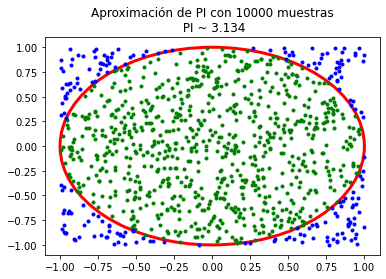

In [ ]:
import matplotlib.pyplot as plt

circle = plt.Circle((0, 0), 1, color='r', fill=False,linewidth=3)

ax = plt.gca()
ax.cla() # limpia para tener un gráfico sin nada extra
ax.add_patch(circle)
plt.plot(samples[0],samples[1],'.',color = 'g')
plt.plot(samples[2],samples[3],'.',color = 'b')
plt.title('Aproximación de PI con '+str(n_samples)+' muestras\n PI ~ '+str(value))
plt.show()

## Sus respuestas del desafío:

Se modifican un poco las funciones para que sea más simple realizar la paralelización. Además se agrega la función secuencial para comparar los tiempos. Se recomienda luego de paralelizar, comparar los tiempos de ejecución de la función secuencial y la función paralela  utilizando ```n_samples = 10000000 ```. Se recomienda testear esta función en su computador de forma local.
 
**Hint:** piense cómo se pueden unir las respuestas de cada proceso, se aconseja modificar levemente la función $aprroximate\_pi\_sec()$.


In [ ]:
n_samples = 10000000

In [ ]:
import math
import random
import time
import multiprocessing as mp

# función secuencial
def approximate_pi_sec(num_samples):
    start = time.time()
    num_inside = 0
    for _ in range(num_samples): 
        x,y = random.uniform(-1, 1), random.uniform(-1, 1)
        if math.hypot(x, y) <= 1:
            num_inside += 1
    print("Finished in: {:.2f}s".format(time.time()-start))
    return "pi ~= {}".format((4*num_inside)/num_samples)

# approximate_pi_sec levemente modificada
def approximate_pi(num_samples):
    pass


# windows
if __name__ == '__main__':

    # enable support for multiprocessing
    mp.freeze_support()

    # función paralela
    def parallel_approximate_pi(num_samples, n_cpu):
        start = time.time()
        print("Finished in: {:.2f}s".format(time.time()-start))
    
    n_cpu = ???
    n_samples = ???

    pi_value_sec = approximate_pi_sec(n_samples)
    pi_value_par = parallel_approximate_pi(n_samples,n_cpu)

    print(pi_value_sec,pi_value_par)

Para que tengan como referencia, los resultados con mi computador usando $n\_cpu=8$ y $n\_samples = 100000000$:

```
Finished in: 59.36s
Finished in: 13.16s
pi ~= 3.14154888 pi ~= 3.14158828
```
Es decir, la función secuencial demoró $59.36s$ y la función paralelizada demoró $13.16s$ en hacer la misma tarea.

**Nota:** Si desea puede usar la líbreria *Joblib*. 

